In [1]:
import numpy as np

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

import time

# Это все заработает со сделанной усложненной домашкой
Добавьте слои `Linear`, `ReLU` и `BCELoss` в модуль `our_library.layers`

# Import our library 

In [2]:
from our_library import layers, wrapper, tools

# Never mind, just data normalization with magic ImageNet numbers

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load MNIST

In [4]:
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

# 2 classes MNIST

In [5]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()

# Data loader for batches and efficient loading

In [6]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Show data

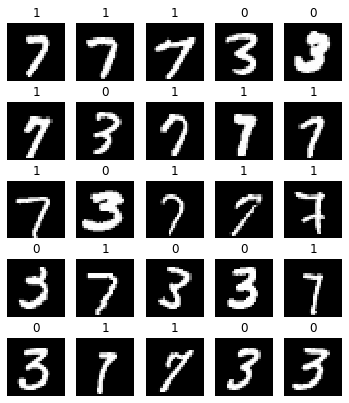

In [7]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

# Our Neural Network

In [8]:
neural_network = layers.NeuralNetwork([layers.Linear(784, 100),
                                       layers.Sigmoid(),
                                       layers.Linear(100, 100),
                                       layers.Sigmoid(),
                                       layers.Linear(100, 1),
                                       layers.Sigmoid()])

loss = layers.BCELoss()

# Train

In [9]:
classifier = wrapper.MNISTWrapper(model=neural_network,
                                  loss=loss,
                                  learning_rate=0.05)

In [10]:
classifier.train(train_loader, test_loader)

Epoch 15: 100%|██████████████████████████████████████████████| 97/97 [00:09<00:00, 10.17it/s, loss=0.133, metric=0.971]


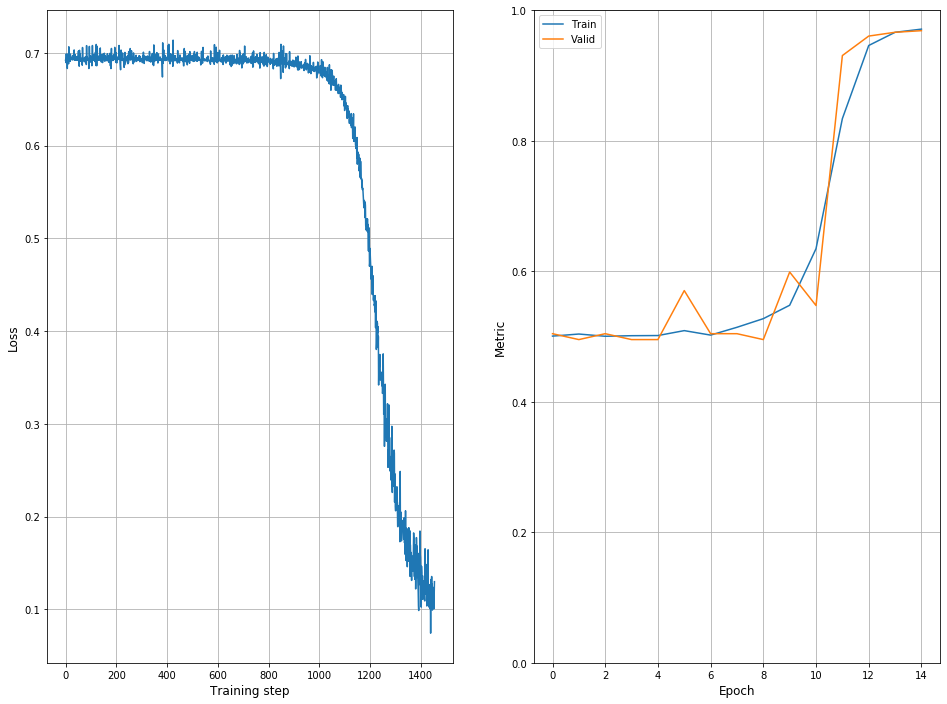

In [11]:
classifier.plot()

# Use ReLU

In [12]:
neural_network = layers.NeuralNetwork([layers.Linear(784, 100),
                                       layers.ReLU(), 
                                       layers.Linear(100, 100),
                                       layers.ReLU(),
                                       layers.Linear(100, 1),
                                       layers.Sigmoid()])

loss = layers.BCELoss()

# Smaller learning rate

In [13]:
classifier = wrapper.MNISTWrapper(model=neural_network, 
                                  loss=loss,
                                  learning_rate=0.01)

In [14]:
classifier.train(train_loader, test_loader)

Epoch 15: 100%|██████████████████████████████████████████████| 97/97 [00:09<00:00, 10.49it/s, loss=0.146, metric=0.976]


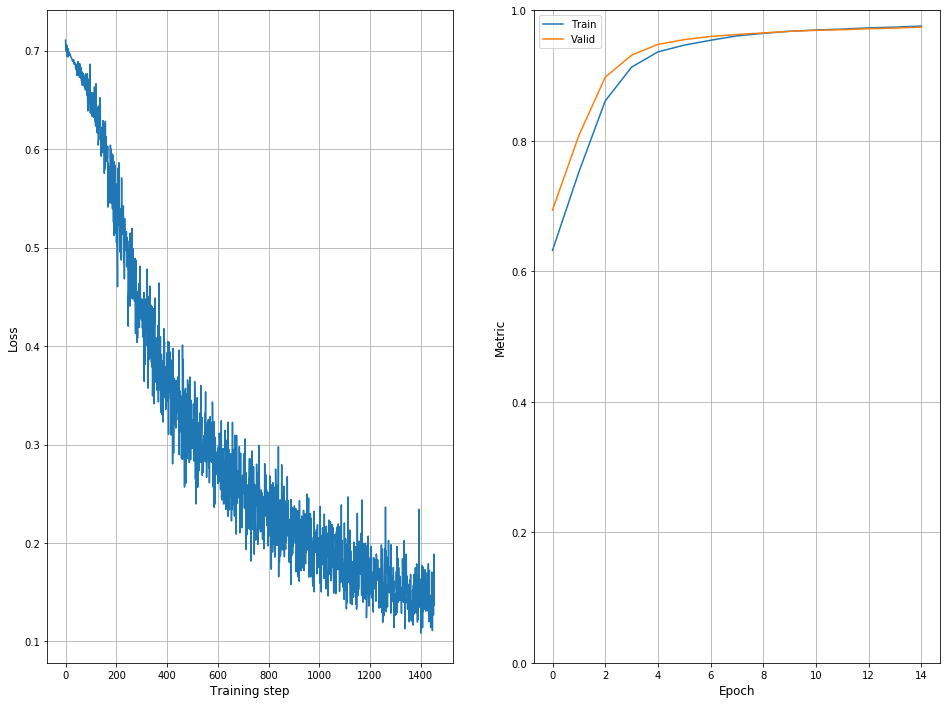

In [15]:
classifier.plot()

# Multi-class

In [16]:
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

In [17]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [18]:
neural_network = layers.NeuralNetwork([layers.Linear(784, 100),
                                       layers.ReLU(), 
                                       layers.Linear(100, 100),
                                       layers.ReLU(),
                                       layers.Linear(100, 10)])

loss = layers.NLLLoss()

In [19]:
classifier = wrapper.MNISTWrapper(model=neural_network,
                                  loss=loss,
                                  learning_rate=0.015,
                                  multi_class=True)

In [20]:
classifier.train(train_loader, test_loader)

Epoch 15: 100%|████████████████████████████████████████████| 469/469 [00:47<00:00,  9.78it/s, loss=0.181, metric=0.946]


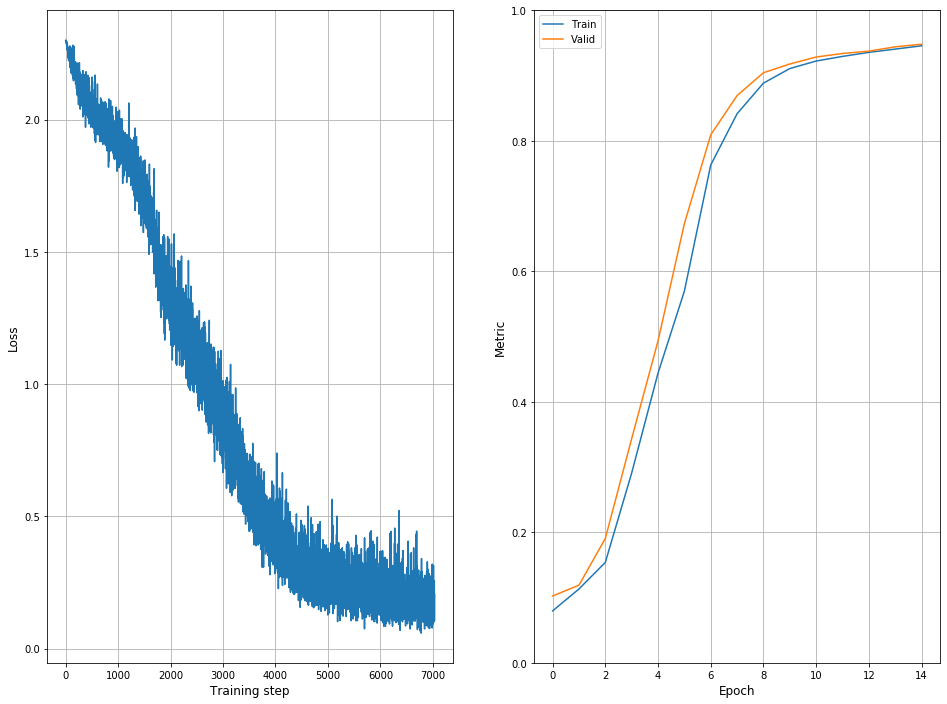

In [21]:
classifier.plot()

# Error analysis

In [22]:
test_x_data = test_loader.dataset.data.view(len(test_loader.dataset), -1).numpy()
test_y_data = test_loader.dataset.targets.numpy()

In [23]:
test_x_prediction = classifier.predict_batch(test_x_data).argmax(1)

In [24]:
print(classification_report(test_y_data, test_x_prediction))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       980
           1       0.99      0.92      0.95      1135
           2       0.85      0.96      0.90      1032
           3       0.84      0.95      0.89      1010
           4       0.97      0.89      0.93       982
           5       0.98      0.84      0.90       892
           6       0.95      0.94      0.95       958
           7       0.99      0.78      0.87      1028
           8       0.84      0.92      0.88       974
           9       0.93      0.87      0.90      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Normalized confusion matrix


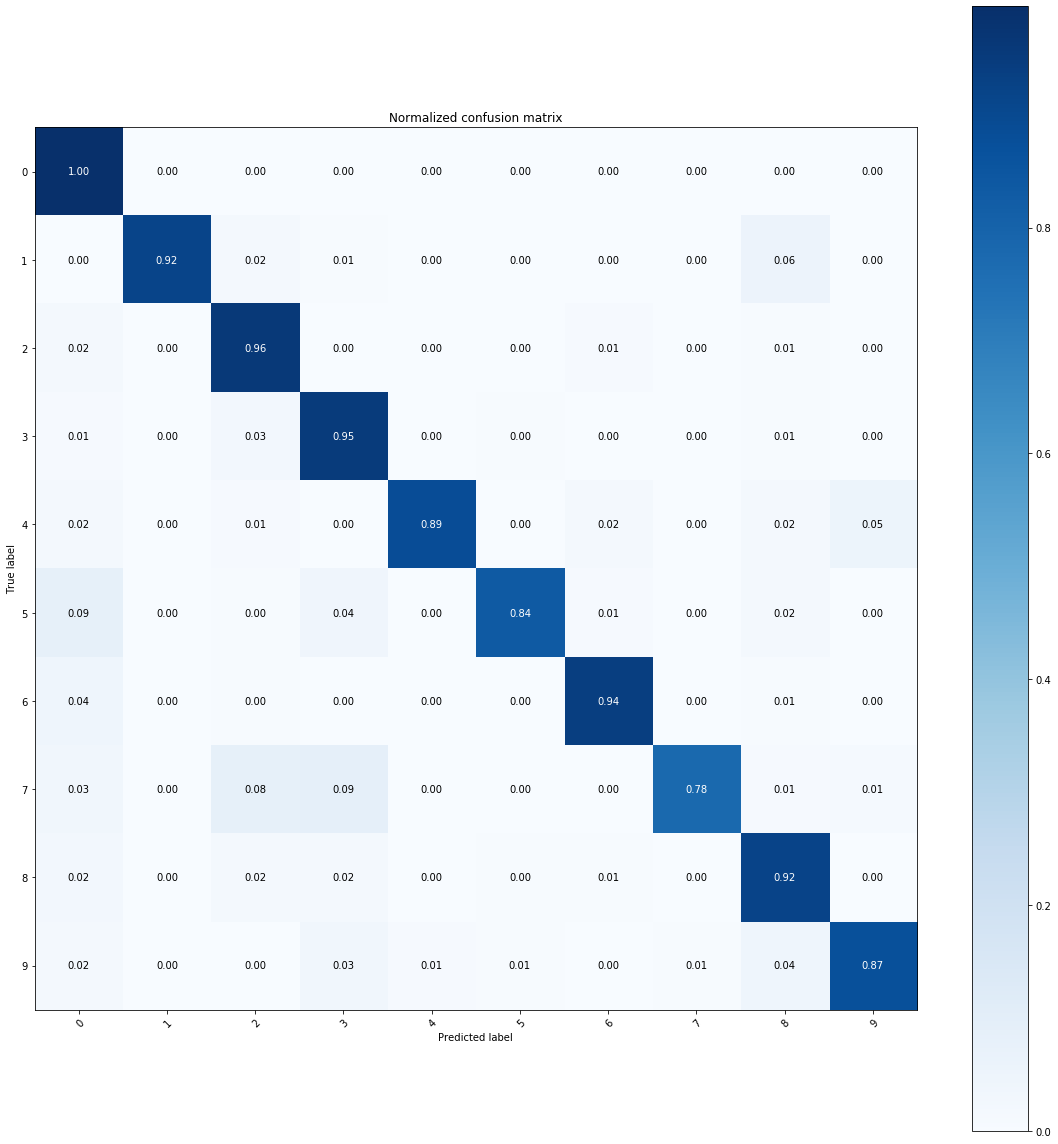

In [25]:
tools.plot_confusion_matrix(test_y_data, test_x_prediction);